# TODO:

- store output of state vars in xarray-simlab data structure
    1. for gekko solver
    2. for odeint solver
    3. for step-wise solver
    
this needs to be completely wrapped in the backend..
i need to somehow combine the "core.parts" so that they are automatically initialized with the xs.Model

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import xsimlab as xs

# to measure process time
import time as tm

In [2]:
from xsimlab.monitoring import ProgressBar

In [3]:
import os,sys,inspect
sys.path.insert(1, os.path.join(sys.path[0], '..'))

import phydra

phydra.core.converters.OdeintConverter.convert
phydra.core.converters.OdeintConverter.convert
phydra.core.converters.OdeintConverter.convert
phydra.core.converters.OdeintConverter.convert
phydra.core.converters.GekkoConverter.convert
phydra.core.converters.GekkoConverter.convert
phydra.core.converters.GekkoConverter.convert
phydra.core.converters.GekkoConverter.convert


In [4]:
from phydra.processes.main import ModelCore, Solver

from phydra.processes.statevars import SV

In [5]:
Model = phydra.create({'core':ModelCore, 'solver':Solver, 'y':SV})

In [6]:
Model

<xsimlab.Model (3 processes, 2 inputs)>
core
    solver_type     [in]
y
    init            [in]
solver

In [7]:
modelsetup = phydra.setup('odeint', Model,
            input_vars={
                'y__init':0.5
            },
            output_vars={
                'y__value':None,
            })

In [8]:
modelsetup2 = phydra.setup('stepwise', Model,       
            time=np.arange(0,20,0.01),
            input_vars={
                'y__init':0.5
            },
            output_vars={
                'y__value':None,
            })

{'y__init': 0.5, 'core__solver_type': 'stepwise'} <class 'dict'>


In [9]:
with ProgressBar(frontend="console"):
        out_ds = modelsetup2.xsimlab.run(model=Model)

▋            7% | run step 147/1999 

initializing model core
initializing state variable
HHHHHEEEE
Model contains: 
 SVs:defaultdict(None, {}) 
 Params:defaultdict(None, {'k': Parameter(name='k', value=0.5)})
 Forcings:defaultdict(None, {})
 Fluxes:defaultdict(<class 'list'>, {'y': [<function ModelCore.initialize.<locals>.linear_loss at 0x114707a60>]})
SV_SETUP y
assembling model
STEPWISE Model Assembly
defaultdict(None, {'k': Parameter(name='k', value=0.5)})
parameters {'k': 0.5}
fluxes {'y': [<function ModelCore.initialize.<locals>.linear_loss at 0x114707a60>]}


██████████ 100% | Simulation finished in 00:02 

finalizing: cleanup


In [10]:
out_ds

<xarray.Dataset>
Dimensions:            (time: 2000)
Coordinates:
  * time               (time) float64 0.0 0.01 0.02 0.03 ... 19.97 19.98 19.99
Data variables:
    core__solver_type  <U8 'stepwise'
    y__init            float64 0.5
    y__value           (time) float64 0.5 0.4975 0.495 ... 2.236e-05 2.225e-05

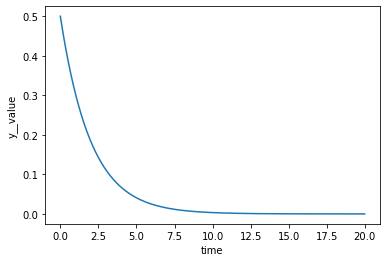

In [11]:
out_ds.y__value.plot()